# EITC + CTC per child

## Setup

### Imports

In [1]:
import taxcalc as tc
import microdf as mdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [2]:
YEAR = 2019

### Utilities

In [3]:
def rt(rate, year=YEAR):
    return {year: rate}

RT_ZERO = rt(0)
RT_ONE = rt(1)
RT_4ZEROS = rt([0, 0, 0, 0])  # For EITC, split by number of children.
RT_5ZEROS = rt([0, 0, 0, 0, 0])  # For others, split by MARS.

In [4]:
REPEAL_CREDITS_REFORM = {
    'EITC_c': RT_4ZEROS,
    'CTC_c': RT_ZERO,
    'ACTC_c': RT_ZERO,
}

## Data

In [70]:
base = mdf.calc_df(year=YEAR, metric_vars=['EIC', 'nu18', 'n24'])[[
    'EIC', 'n24', 'nu18', 'n24_m', 'nu18_m', 'EIC_m', 
    'aftertax_income', 's006']]

In [71]:
reform = mdf.calc_df(year=YEAR, 
                     reform=REPEAL_CREDITS_REFORM)[['aftertax_income']]

CTC_c was redefined in release 1.0.0



In [72]:
base['aftertax_income_reform'] = reform.aftertax_income

In [73]:
base['tax_diff'] = base.aftertax_income - base.aftertax_income_reform
base['tax_diff_per_nu18'] = base.tax_diff / base.nu18
base['tax_diff_per_n24'] = base.tax_diff / base.n24
base['tax_diff_per_EIC'] = base.tax_diff / base.EIC

In [74]:
base[base.tax_diff_per_nu18 < np.inf].tax_diff_per_nu18.max()

7895.423292908465

In [75]:
base[base.tax_diff_per_n24 < np.inf].tax_diff_per_n24.max()

7975.050000000003

In [76]:
base[base.tax_diff_per_EIC < np.inf].tax_diff_per_EIC.max()

6666.666666666667

In [77]:
base[base.tax_diff_per_nu18 < np.inf].sort_values(
    'tax_diff_per_nu18', ascending=False).head(10)

,EIC,n24,nu18,n24_m,nu18_m,EIC_m,aftertax_income,s006,aftertax_income_reform,tax_diff,tax_diff_per_nu18,tax_diff_per_n24,tax_diff_per_EIC
RECID,,,,,,,,,,,,,
208027,3.0,1.0,1.0,0.001436,0.001436,0.004309,21241.807524,1436.27,13346.384231,7895.423293,7895.423293,7895.423293,2631.807764
329848,2.0,1.0,1.0,0.000696,0.000696,0.001392,50369.827832,695.86,42963.608976,7406.218856,7406.218856,7406.218856,3703.109428
125514,2.0,1.0,1.0,0.002314,0.002314,0.004628,55390.739425,2313.83,47988.347786,7402.391640,7402.391640,7402.391640,3701.195820
5709,2.0,1.0,1.0,0.000067,0.000067,0.000134,25055.028463,67.14,17659.871415,7395.157048,7395.157048,7395.157048,3697.578524
250572,2.0,1.0,1.0,0.000652,0.000652,0.001304,51297.206940,651.81,43912.145732,7385.061208,7385.061208,7385.061208,3692.530604
140970,2.0,1.0,1.0,0.000668,0.000668,0.001336,87227.479811,668.13,79847.685336,7379.794474,7379.794474,7379.794474,3689.897237
202459,2.0,1.0,1.0,0.001527,0.001527,0.003054,64488.648965,1526.96,57140.791220,7347.857745,7347.857745,7347.857745,3673.928873
310519,2.0,1.0,1.0,0.000215,0.000215,0.000430,23956.016261,215.04,16629.221582,7326.794679,7326.794679,7326.794679,3663.397340
121221,2.0,1.0,1.0,0.000516,0.000516,0.001032,30284.497429,515.86,22971.000942,7313.496487,7313.496487,7313.496487,3656.748244


In [78]:
base[base.tax_diff_per_EIC < np.inf].sort_values(
    'tax_diff_per_EIC', ascending=False).head(10)

,EIC,n24,nu18,n24_m,nu18_m,EIC_m,aftertax_income,s006,aftertax_income_reform,tax_diff,tax_diff_per_nu18,tax_diff_per_n24,tax_diff_per_EIC
RECID,,,,,,,,,,,,,
358917,3.0,10.0,10.0,0.001941,0.001941,0.000582,118983.766336,194.14,98983.766336,20000.0,2000.0,2000.0,6666.666667
351551,3.0,10.0,10.0,0.000668,0.000668,0.000200,258706.627361,66.81,238706.627361,20000.0,2000.0,2000.0,6666.666667
351559,3.0,10.0,10.0,0.000668,0.000668,0.000200,295860.732384,66.81,275860.732384,20000.0,2000.0,2000.0,6666.666667
351558,3.0,10.0,10.0,0.000668,0.000668,0.000200,333917.471305,66.81,313917.471305,20000.0,2000.0,2000.0,6666.666667
351557,3.0,10.0,10.0,0.000668,0.000668,0.000200,230220.108731,66.81,210220.108731,20000.0,2000.0,2000.0,6666.666667
351553,3.0,10.0,10.0,0.000668,0.000668,0.000200,330577.417958,66.81,310577.417958,20000.0,2000.0,2000.0,6666.666667
351555,3.0,10.0,10.0,0.000668,0.000668,0.000200,134869.718133,66.81,114869.718133,20000.0,2000.0,2000.0,6666.666667
351549,3.0,10.0,10.0,0.000668,0.000668,0.000200,210178.329264,66.81,190178.329264,20000.0,2000.0,2000.0,6666.666667
351548,3.0,10.0,10.0,0.000668,0.000668,0.000200,213443.038747,66.81,193443.038747,20000.0,2000.0,2000.0,6666.666667


In [79]:
def pct_kids_better_off(allowance, var='nu18'):
    var_m = var + '_m'
    return (base[base['tax_diff_per_' + var] < allowance][[var_m]].sum() /
            base[[var_m]].sum()).values[0]

In [80]:
X = pd.Series(np.arange(0, 8000, 100))

def pct_kids_better_off_plot(var='nu18'):
    pct_kids_better_off_s = X.apply(lambda x: pct_kids_better_off(x, var))
    pct_kids_better_off_s.index = X
    print(pct_kids_better_off_s[[4500, 6500]])
    pct_kids_better_off_s.plot()
    plt.title('% children better off by replacing EITC/CTC/CDCC ' +
              'w/ child allowance')
    plt.show()

4500    0.970600
6500    0.998985
dtype: float64


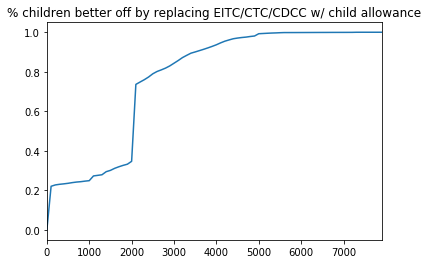

In [81]:
pct_kids_better_off_plot()

4500    0.964858
6500    0.999964
dtype: float64


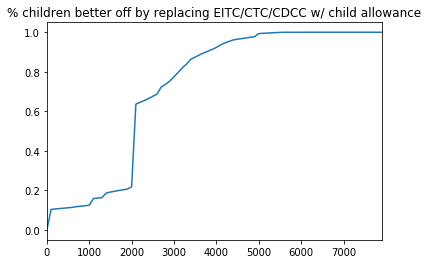

In [82]:
pct_kids_better_off_plot('EIC')